In [7]:
#!pip install tensorflow
import tensorflow as tf

  Using cached tensorflow-2.11.0-cp37-cp37m-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp37-cp37m-win_amd64.whl (266.3 MB)
  Using cached flatbuffers-22.12.6-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.51.1-cp37-cp37m-win_amd64.whl (3.7 MB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached packaging-22.0-py3-none-any.whl (42 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cach

In [5]:
import torch

In [14]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [101]:
mnist=tf.keras.datasets.mnist

In [102]:
(x_trainfull,y_train_full),(x_test,y_test)=mnist.load_data()

In [103]:
x_trainfull.shape

(60000, 28, 28)

In [104]:
img=x_trainfull[0]

In [105]:
import matplotlib.pyplot as plt

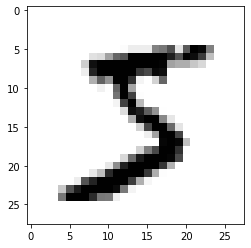

In [106]:
plt.imshow(img,cmap='binary')

In [107]:
#!pip install seaborn 
import seaborn as sns

<AxesSubplot:>

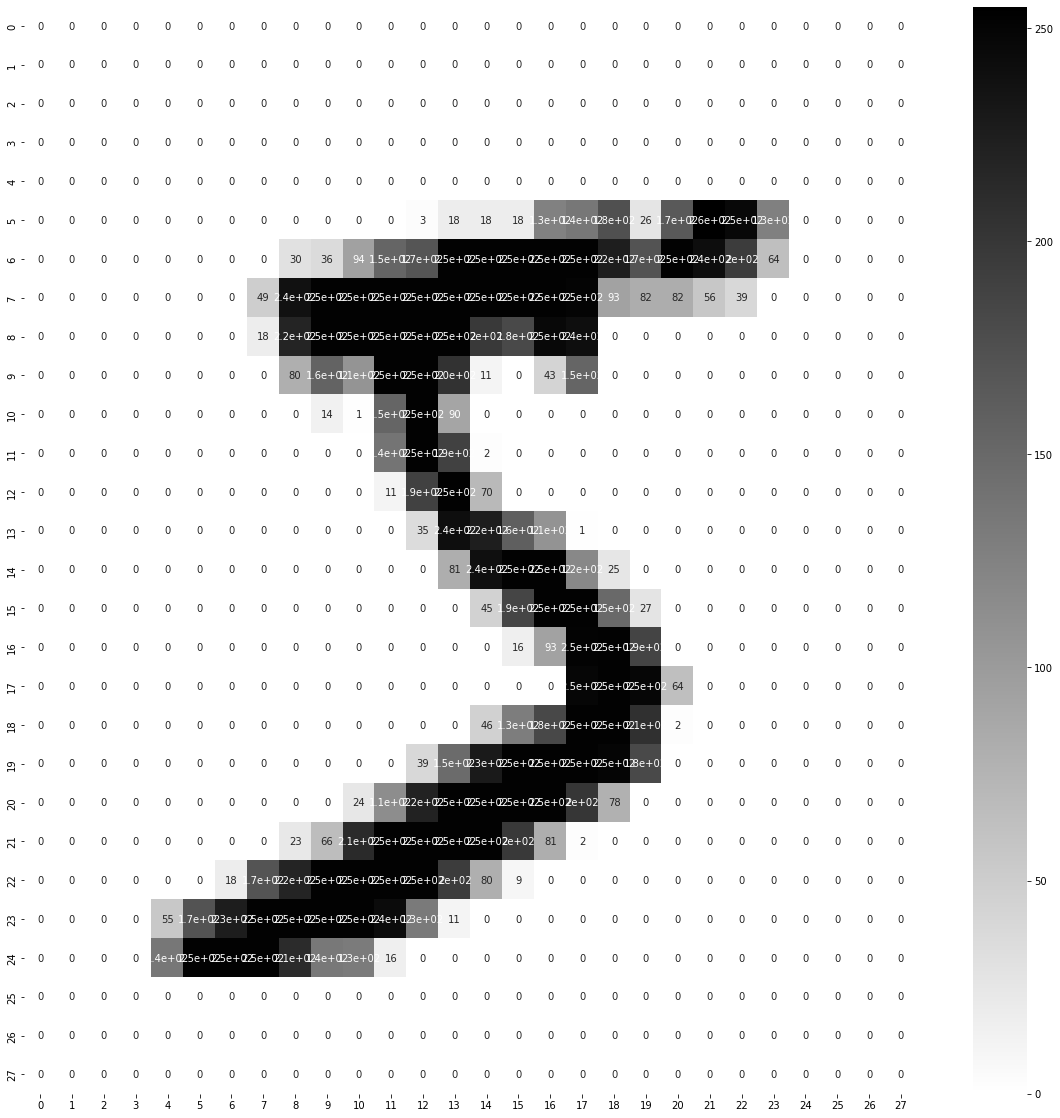

In [108]:
plt.figure(figsize=(20,20))
sns.heatmap(img,annot=True,cmap='binary')


In [126]:
x_valid,x_train=x_trainfull[:5000]/255,x_trainfull[5000:]/255
y_vaild,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test/255

In [127]:
CLASS=10
LAYERS=[
    tf.keras.layers.Flatten(input_shape=(28,28),name='input_layer'),
    tf.keras.layers.Dense(400,activation='relu',name='hidden_layer_1'),
    tf.keras.layers.Dense(200,activation='relu',name='hidden_layer_2'),
    tf.keras.layers.Dense(CLASS,activation='softmax',name='output_layer')
]

In [128]:
model_clf=tf.keras.models.Sequential(LAYERS)
model_clf.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 400)               314000    
                                                                 
 hidden_layer_2 (Dense)      (None, 200)               80200     
                                                                 
 output_layer (Dense)        (None, 10)                2010      
                                                                 
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


In [129]:
LOSS_fn="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICES=["accuracy"]

In [130]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

# model_clf1.compile(loss=LOSS_FUNCTION, 
#                   optimizer=OPTIMIZER,
#                   metrics=METRICS)

In [131]:
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICES)

In [132]:
y_train.shape

(55000,)

In [133]:
VALIDATION=(x_valid,y_vaild)
EPOCHS=5
history=model_clf.fit(x_train,y_train,epochs=EPOCHS,validation_data=VALIDATION)

Epoch 1/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5885 - accuracy: 0.8517 - val_loss: 0.3036 - val_accuracy: 0.9166
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2844 - accuracy: 0.9199 - val_loss: 0.2439 - val_accuracy: 0.9338
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2338 - accuracy: 0.9333 - val_loss: 0.2014 - val_accuracy: 0.9456
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2001 - accuracy: 0.9429 - val_loss: 0.1783 - val_accuracy: 0.9532
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1752 - accuracy: 0.9501 - val_loss: 0.1568 - val_accuracy: 0.9594


In [135]:
import pandas as pd

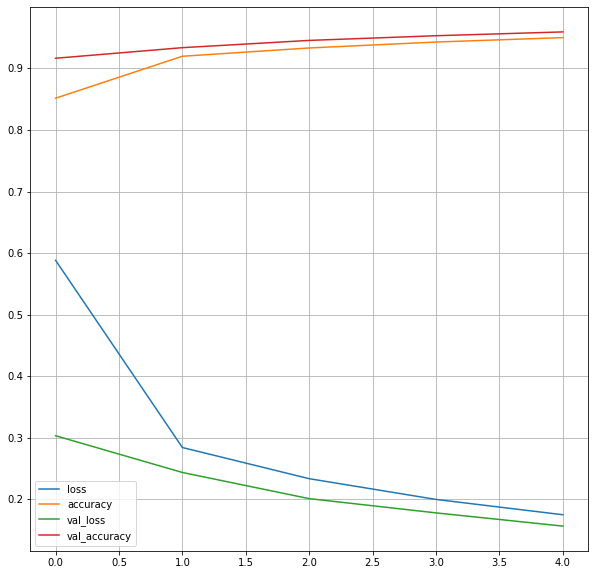

In [138]:
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.show()

In [139]:
model_clf.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1608 - accuracy: 0.9556


[0.160844624042511, 0.9556000232696533]

In [140]:
model_clf.save('model.h5')

In [148]:
y_pred=model_clf.predict(x_train[:100])

4/4 [==============================] - 0s 3ms/step


In [149]:
import numpy as np
pred=np.argmax(y_pred,axis=-1)
pred

array([7, 3, 9, 6, 1, 8, 1, 0, 9, 8, 0, 3, 1, 0, 7, 0, 2, 9, 6, 0, 1, 6,
       7, 1, 9, 7, 6, 5, 5, 8, 8, 3, 4, 4, 8, 7, 3, 6, 4, 6, 6, 3, 8, 8,
       9, 9, 4, 4, 0, 7, 8, 1, 5, 0, 1, 8, 5, 7, 1, 7, 5, 5, 9, 9, 4, 2,
       5, 3, 7, 4, 6, 6, 0, 1, 0, 1, 2, 4, 8, 5, 3, 5, 0, 0, 6, 4, 3, 8,
       3, 7, 1, 4, 3, 9, 2, 2, 0, 3, 6, 6], dtype=int64)

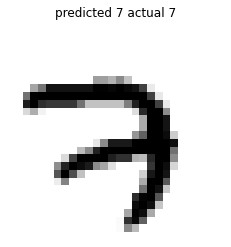

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


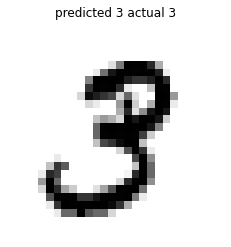

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


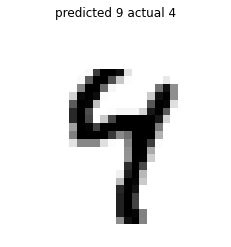

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


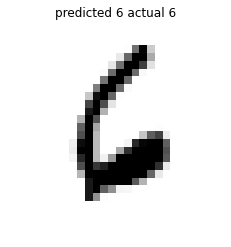

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


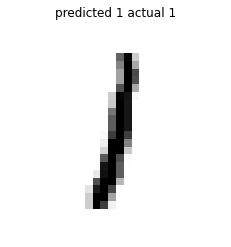

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


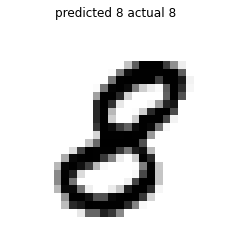

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


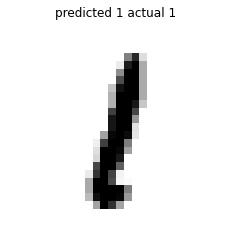

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


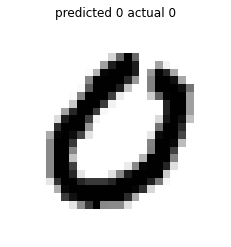

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


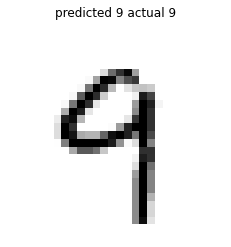

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


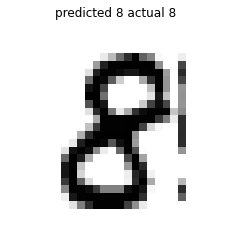

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


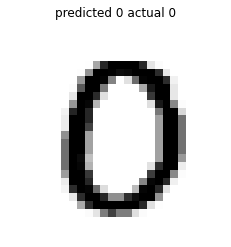

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


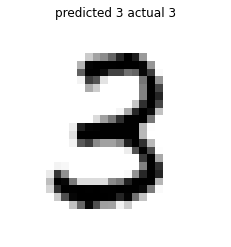

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


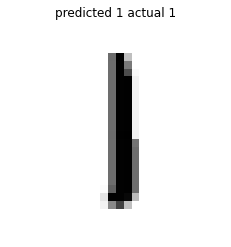

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


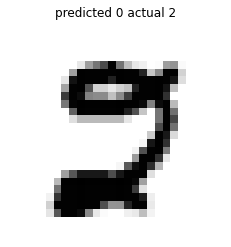

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


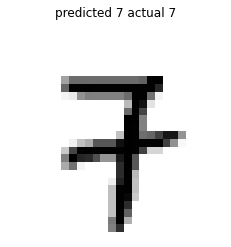

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


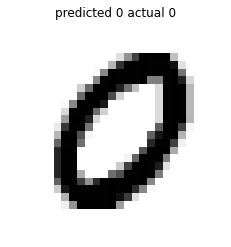

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


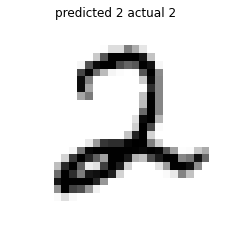

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


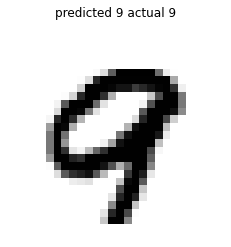

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


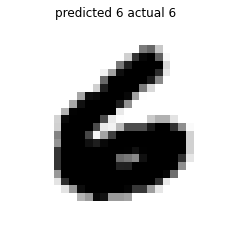

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


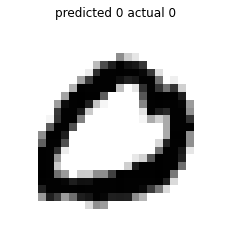

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


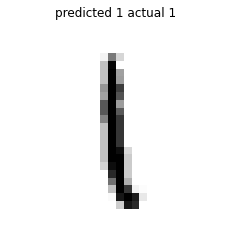

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


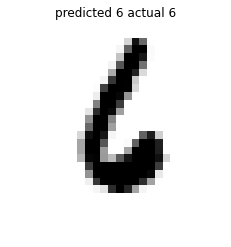

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


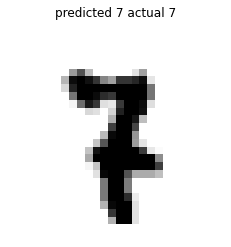

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


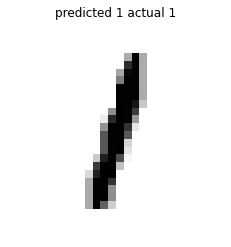

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


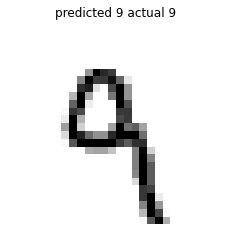

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


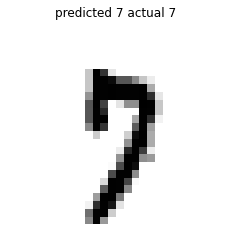

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


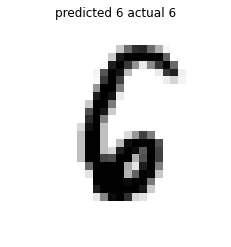

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


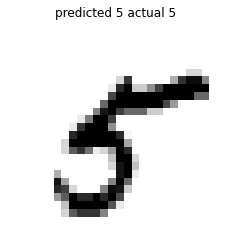

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


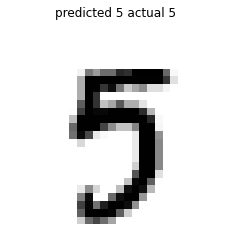

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


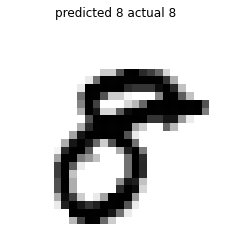

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


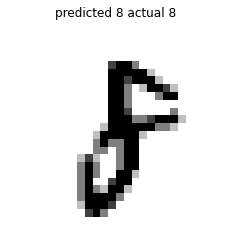

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


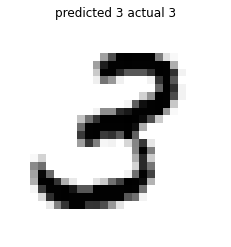

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


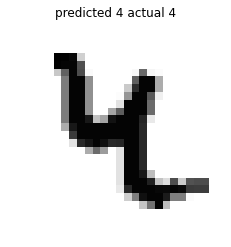

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


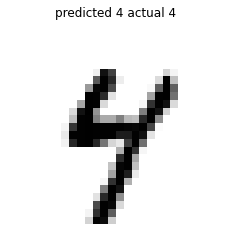

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


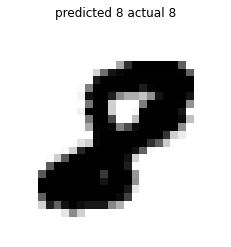

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


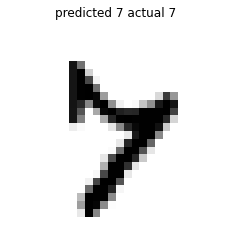

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


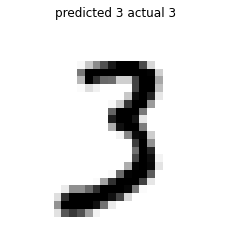

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


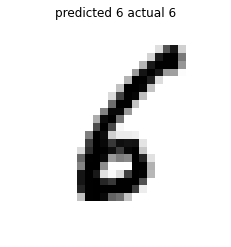

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


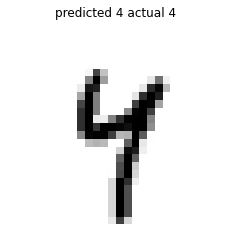

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


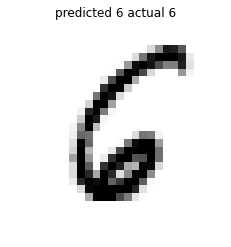

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


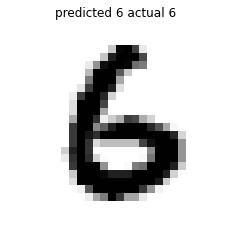

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


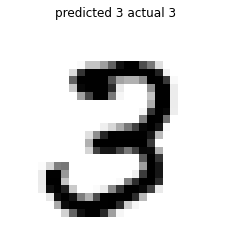

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


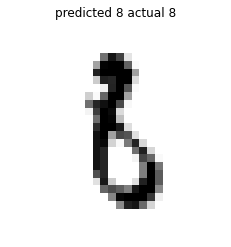

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


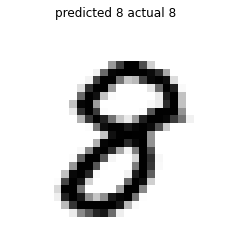

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


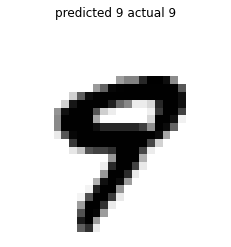

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


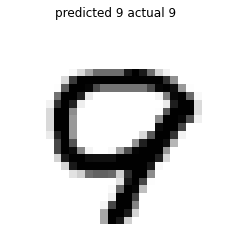

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


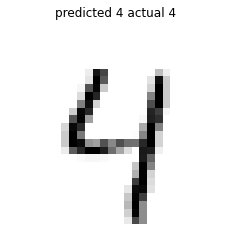

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


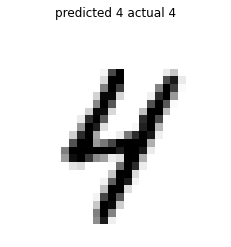

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


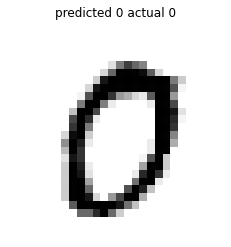

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


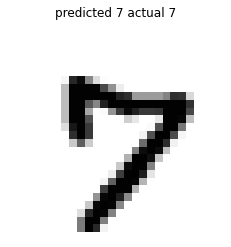

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


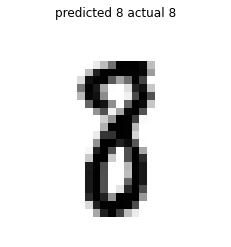

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


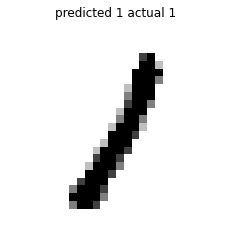

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


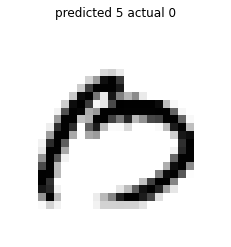

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


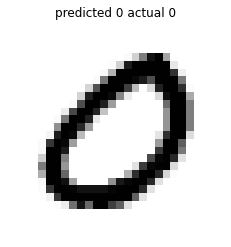

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


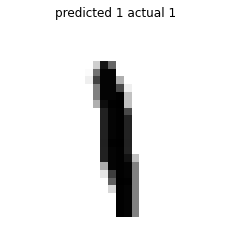

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


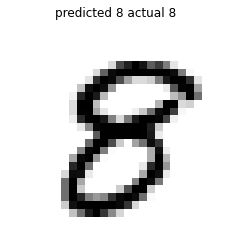

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


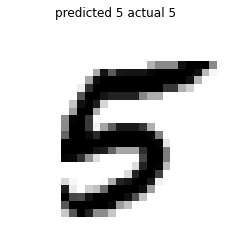

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


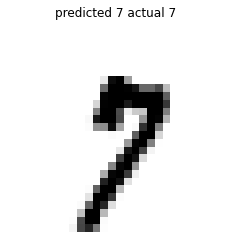

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


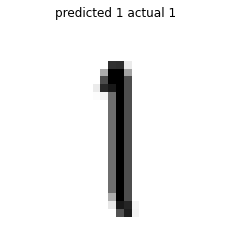

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


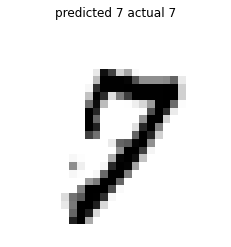

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


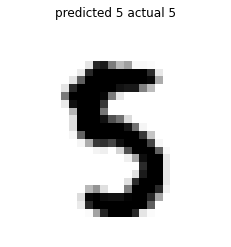

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


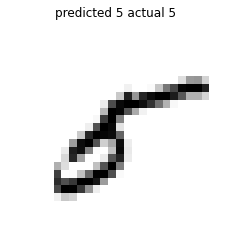

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


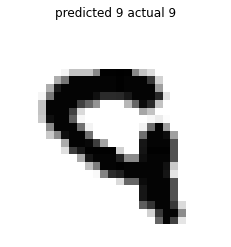

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


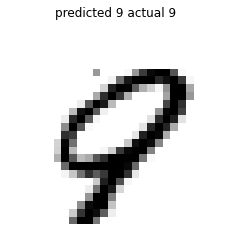

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


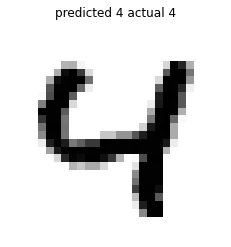

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


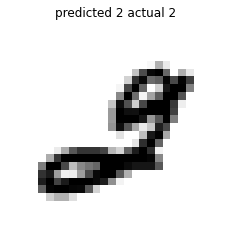

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


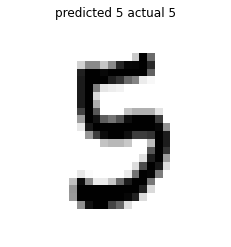

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


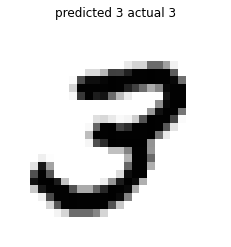

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


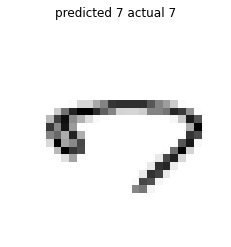

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


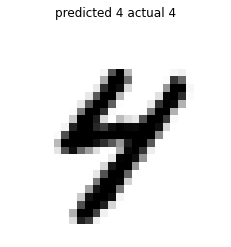

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


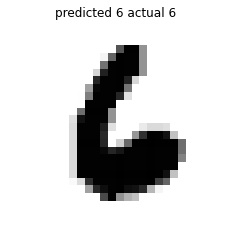

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


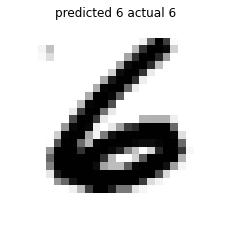

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


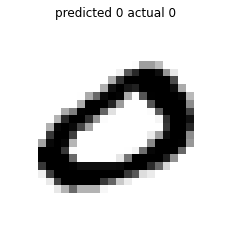

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


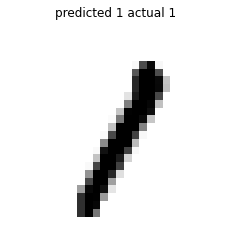

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


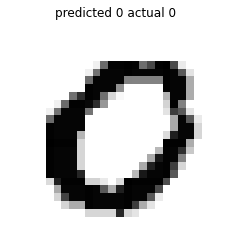

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


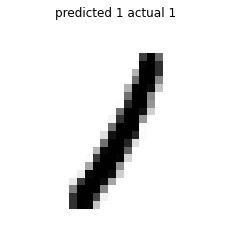

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


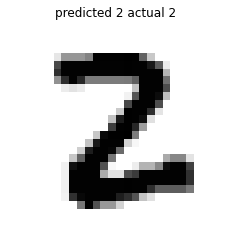

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


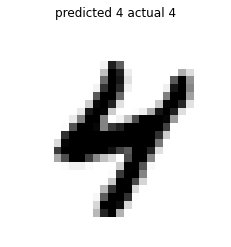

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


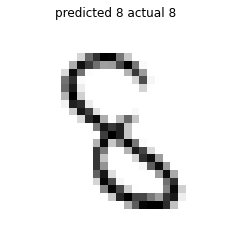

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


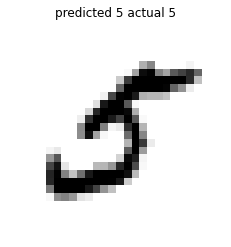

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


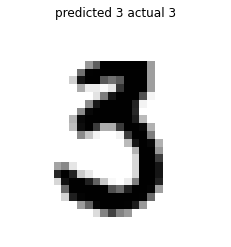

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


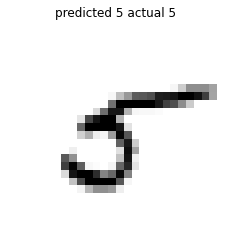

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


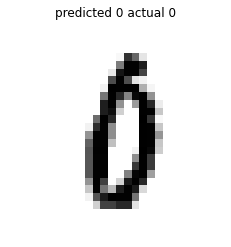

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


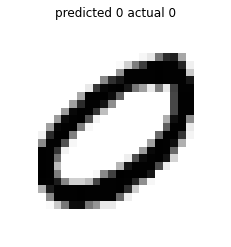

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


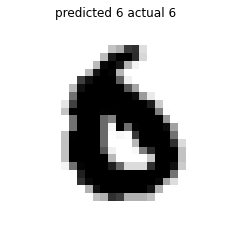

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


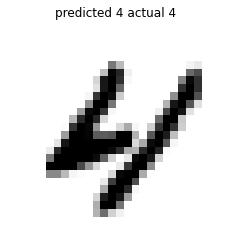

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


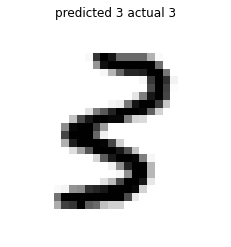

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


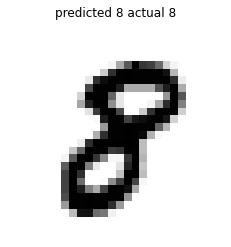

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


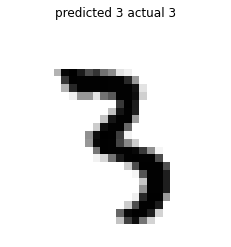

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


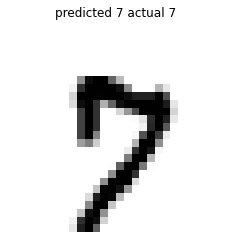

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


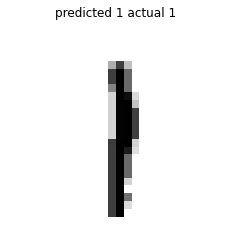

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


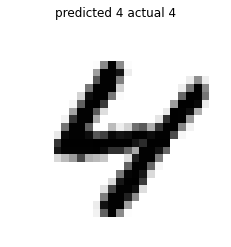

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


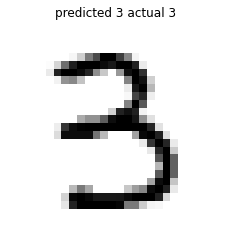

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


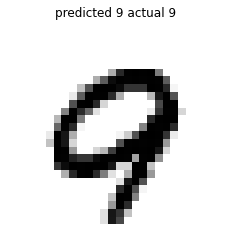

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


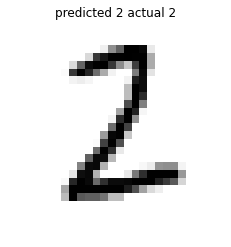

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


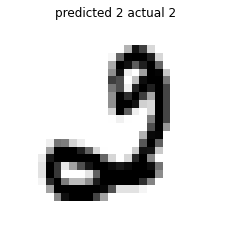

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


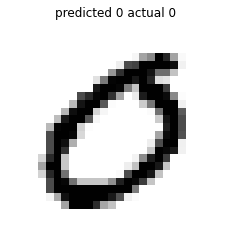

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


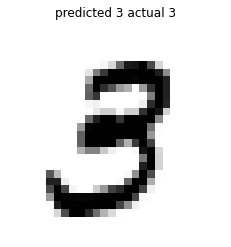

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


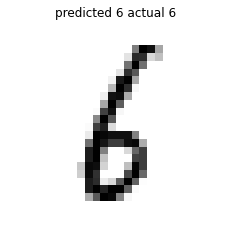

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


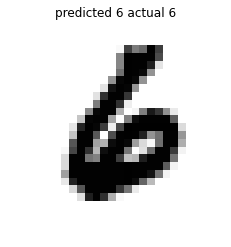

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [151]:
for img,pre,actual in zip(x_train[:100],pred,y_train[:100]):
    plt.imshow(img,cmap='binary')
    plt.title(f"predicted {pre} actual {actual}")
    plt.axis('off')
    plt.show()
    print("-------"*30)

In [119]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [120]:
X_valid, X_train = X_train_full[:5000] , X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]



X_test = X_test 

In [121]:
CLASSES = 10

LAYERS = [
          tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"),
]

In [122]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [123]:
model_clf.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [124]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, 
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [125]:
EPOCHS = 5
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, 
              epochs=EPOCHS, batch_size=16,
              validation_data=VALIDATION)

Epoch 1/10
3438/3438 [==============================] - 14s 4ms/step - loss: nan - accuracy: 0.0989 - val_loss: nan - val_accuracy: 0.0958
Epoch 2/10
3438/3438 [==============================] - 12s 4ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 3/10
3438/3438 [==============================] - 13s 4ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 4/10
3438/3438 [==============================] - 13s 4ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 5/10
3438/3438 [==============================] - 14s 4ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 6/10
3438/3438 [==============================] - 14s 4ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 7/10
3438/3438 [==============================] - 12s 4ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0958
Epoch 8/10
3438/3438 [=====